In [ ]:
# IMPORT 8 LIBRARIES:
import urllib.request
import torch
import torch.nn as nn
from collections import Counter, defaultdict
import math
import re
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
corpus = "The Wonderful Wizard of Oz is a children's novel written by L. Frank Baum."

In [ ]:
words = corpus.split()
print(words)

['The', 'Wonderful', 'Wizard', 'of', 'Oz', 'is', 'a', "children's", 'novel', 'written', 'by', 'L.', 'Frank', 'Baum.']


In [ ]:
tokens = []
for word in words:
    tokens.append(list(word) + ['</w>'])
print(tokens)

[['T', 'h', 'e', '</w>'], ['W', 'o', 'n', 'd', 'e', 'r', 'f', 'u', 'l', '</w>'], ['W', 'i', 'z', 'a', 'r', 'd', '</w>'], ['o', 'f', '</w>'], ['O', 'z', '</w>'], ['i', 's', '</w>'], ['a', '</w>'], ['c', 'h', 'i', 'l', 'd', 'r', 'e', 'n', "'", 's', '</w>'], ['n', 'o', 'v', 'e', 'l', '</w>'], ['w', 'r', 'i', 't', 't', 'e', 'n', '</w>'], ['b', 'y', '</w>'], ['L', '.', '</w>'], ['F', 'r', 'a', 'n', 'k', '</w>'], ['B', 'a', 'u', 'm', '.', '</w>']]


In [ ]:
token_string = []
for token in tokens:
    token_string.append(' '.join(token))
print(token_string)

['T h e </w>', 'W o n d e r f u l </w>', 'W i z a r d </w>', 'o f </w>', 'O z </w>', 'i s </w>', 'a </w>', "c h i l d r e n ' s </w>", 'n o v e l </w>', 'w r i t t e n </w>', 'b y </w>', 'L . </w>', 'F r a n k </w>', 'B a u m . </w>']


In [ ]:
token_count = Counter(token_string)
print(token_count)

Counter({'T h e </w>': 1, 'W o n d e r f u l </w>': 1, 'W i z a r d </w>': 1, 'o f </w>': 1, 'O z </w>': 1, 'i s </w>': 1, 'a </w>': 1, "c h i l d r e n ' s </w>": 1, 'n o v e l </w>': 1, 'w r i t t e n </w>': 1, 'b y </w>': 1, 'L . </w>': 1, 'F r a n k </w>': 1, 'B a u m . </w>': 1})


In [ ]:
pairs = defaultdict(int)
for word,freq in token_count.items():
    unique = word.split()
    for i in range(len(unique)-1):
        pairs[unique[i],unique[i+1]] += freq
print(pairs)

defaultdict(<class 'int'>, {('T', 'h'): 1, ('h', 'e'): 1, ('e', '</w>'): 1, ('W', 'o'): 1, ('o', 'n'): 1, ('n', 'd'): 1, ('d', 'e'): 1, ('e', 'r'): 1, ('r', 'f'): 1, ('f', 'u'): 1, ('u', 'l'): 1, ('l', '</w>'): 2, ('W', 'i'): 1, ('i', 'z'): 1, ('z', 'a'): 1, ('a', 'r'): 1, ('r', 'd'): 1, ('d', '</w>'): 1, ('o', 'f'): 1, ('f', '</w>'): 1, ('O', 'z'): 1, ('z', '</w>'): 1, ('i', 's'): 1, ('s', '</w>'): 2, ('a', '</w>'): 1, ('c', 'h'): 1, ('h', 'i'): 1, ('i', 'l'): 1, ('l', 'd'): 1, ('d', 'r'): 1, ('r', 'e'): 1, ('e', 'n'): 2, ('n', "'"): 1, ("'", 's'): 1, ('n', 'o'): 1, ('o', 'v'): 1, ('v', 'e'): 1, ('e', 'l'): 1, ('w', 'r'): 1, ('r', 'i'): 1, ('i', 't'): 1, ('t', 't'): 1, ('t', 'e'): 1, ('n', '</w>'): 1, ('b', 'y'): 1, ('y', '</w>'): 1, ('L', '.'): 1, ('.', '</w>'): 2, ('F', 'r'): 1, ('r', 'a'): 1, ('a', 'n'): 1, ('n', 'k'): 1, ('k', '</w>'): 1, ('B', 'a'): 1, ('a', 'u'): 1, ('u', 'm'): 1, ('m', '.'): 1})


In [ ]:
vocab_size = 50
vocab_len = len(token_count)
print(vocab_len)

14


In [ ]:
requiredmerges = vocab_size - vocab_len
print(requiredmerges)

36


In [ ]:
pair = ('l','</w>')
joined_pair = ' '.join(pair)
print(joined_pair)

l </w>


In [ ]:
bigram = re.escape(joined_pair)
print(bigram)

l\ </w>


In [ ]:
p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
print(p)

re.compile('(?<!\\S)l\\ </w>(?!\\S)')


In [ ]:
new_vocab = {}

In [ ]:
for word in token_count:
    wout = p.sub(''.join(pair),word)
    new_vocab[wout] = token_count[word]
    print(wout)
print(new_vocab)

T h e </w>
W o n d e r f u l</w>
W i z a r d </w>
o f </w>
O z </w>
i s </w>
a </w>
c h i l d r e n ' s </w>
n o v e l</w>
w r i t t e n </w>
b y </w>
L . </w>
F r a n k </w>
B a u m . </w>
{'T h e </w>': 1, 'W o n d e r f u l</w>': 1, 'W i z a r d </w>': 1, 'o f </w>': 1, 'O z </w>': 1, 'i s </w>': 1, 'a </w>': 1, "c h i l d r e n ' s </w>": 1, 'n o v e l</w>': 1, 'w r i t t e n </w>': 1, 'b y </w>': 1, 'L . </w>': 1, 'F r a n k </w>': 1, 'B a u m . </w>': 1}


In [ ]:
for i in range(3):
    if not pairs:
       break
    best = max(pairs,key=pairs.get)


('l', '</w>')
('l', '</w>')
('l', '</w>')
('l', '</w>')
('l', '</w>')
('l', '</w>')
('l', '</w>')
('l', '</w>')
('l', '</w>')
('l', '</w>')
('l', '</w>')
('l', '</w>')
('l', '</w>')
('l', '</w>')
('l', '</w>')
('l', '</w>')
('l', '</w>')
('l', '</w>')
('l', '</w>')
('l', '</w>')
('l', '</w>')
('l', '</w>')
('l', '</w>')
('l', '</w>')
('l', '</w>')
('l', '</w>')
('l', '</w>')
('l', '</w>')
('l', '</w>')
('l', '</w>')
('l', '</w>')
('l', '</w>')
('l', '</w>')
('l', '</w>')
('l', '</w>')
('l', '</w>')


In [ ]:
# function for creating pairs:
def create_pairs(token_count):
    pairs1 = defaultdict(int)
    for word,freq in token_count.items():
        symbol = word.split()
        for i in range(len(symbol)-1):
            pairs1[symbol[i],symbol[i+1]] += freq
    return pairs1

In [ ]:
# function to merge pairs and update new_vocabulary:
def merge_pairs(pair1,token_count):
    bigram = re.escape(' '.join(pair1))
    p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
    new_vocab = {}
    for word in token_count:
        wout = p.sub(''.join(pair1),word)
        new_vocab[wout] = token_count[word]
    return new_vocab

In [ ]:
# now fill the byte pair encoding and bpe reverse dictionaries for reference to encode corpus:
bpe_codes = {}
bpe_codes_reverse = {}
def fit_bpe(token_count):
    for i in range(36):
        pairing = create_pairs(token_count)
        if not pairing:
           break
        best1 = max(pairing,key=pairing.get)
        token_count = merge_pairs(best1,token_count)
        bpe_codes[best1] = i
        bpe_codes_reverse[''.join(best1)] = best1
        print("pairing:",pairing)
        print("best1:",best1)
        print("token_count:",token_count)
        print("bpe_codes:",bpe_codes)
        print("bpe_codes_reverse:",bpe_codes_reverse)
    return token_count, bpe_codes, bpe_codes_reverse

In [ ]:
bpe_fit = fit_bpe(token_count)

pairing: defaultdict(<class 'int'>, {('T', 'h'): 1, ('h', 'e'): 1, ('e', '</w>'): 1, ('W', 'o'): 1, ('o', 'n'): 1, ('n', 'd'): 1, ('d', 'e'): 1, ('e', 'r'): 1, ('r', 'f'): 1, ('f', 'u'): 1, ('u', 'l'): 1, ('l', '</w>'): 2, ('W', 'i'): 1, ('i', 'z'): 1, ('z', 'a'): 1, ('a', 'r'): 1, ('r', 'd'): 1, ('d', '</w>'): 1, ('o', 'f'): 1, ('f', '</w>'): 1, ('O', 'z'): 1, ('z', '</w>'): 1, ('i', 's'): 1, ('s', '</w>'): 2, ('a', '</w>'): 1, ('c', 'h'): 1, ('h', 'i'): 1, ('i', 'l'): 1, ('l', 'd'): 1, ('d', 'r'): 1, ('r', 'e'): 1, ('e', 'n'): 2, ('n', "'"): 1, ("'", 's'): 1, ('n', 'o'): 1, ('o', 'v'): 1, ('v', 'e'): 1, ('e', 'l'): 1, ('w', 'r'): 1, ('r', 'i'): 1, ('i', 't'): 1, ('t', 't'): 1, ('t', 'e'): 1, ('n', '</w>'): 1, ('b', 'y'): 1, ('y', '</w>'): 1, ('L', '.'): 1, ('.', '</w>'): 2, ('F', 'r'): 1, ('r', 'a'): 1, ('a', 'n'): 1, ('n', 'k'): 1, ('k', '</w>'): 1, ('B', 'a'): 1, ('a', 'u'): 1, ('u', 'm'): 1, ('m', '.'): 1})
best1: ('l', '</w>')
token_count: {'T h e </w>': 1, 'W o n d e r f u l</w>

In [ ]:
# bpe_codes: {('l', '</w>'): 0, ('s', '</w>'): 1, ('e', 'n'): 2, ('.', '</w>'): 3, ('T', 'h'): 4, ('Th', 'e'): 5, ('The', '</w>'): 6, ('W', 'o'): 7, ('Wo', 'n'): 8, ('Won', 'd'): 9, ('Wond', 'e'): 10, ('Wonde', 'r'): 11, ('Wonder', 'f'): 12, ('Wonderf', 'u'): 13, ('Wonderfu', 'l</w>'): 14, ('W', 'i'): 15, ('Wi', 'z'): 16, ('Wiz', 'a'): 17, ('Wiza', 'r'): 18, ('Wizar', 'd'): 19, ('Wizard', '</w>'): 20, ('o', 'f'): 21, ('of', '</w>'): 22, ('O', 'z'): 23, ('Oz', '</w>'): 24, ('i', 's</w>'): 25, ('a', '</w>'): 26, ('c', 'h'): 27, ('ch', 'i'): 28, ('chi', 'l'): 29, ('chil', 'd'): 30, ('child', 'r'): 31, ('childr', 'en'): 32, ('children', "'"): 33, ("children'", 's</w>'): 34, ('n', 'o'): 35}
# bpe_codes_reverse: {'l</w>': ('l', '</w>'), 's</w>': ('s', '</w>'), 'en': ('e', 'n'), '.</w>': ('.', '</w>'), 'Th': ('T', 'h'), 'The': ('Th', 'e'), 'The</w>': ('The', '</w>'), 'Wo': ('W', 'o'), 'Won': ('Wo', 'n'), 'Wond': ('Won', 'd'), 'Wonde': ('Wond', 'e'), 'Wonder': ('Wonde', 'r'), 'Wonderf': ('Wonder', 'f'), 'Wonderfu': ('Wonderf', 'u'), 'Wonderful</w>': ('Wonderfu', 'l</w>'), 'Wi': ('W', 'i'), 'Wiz': ('Wi', 'z'), 'Wiza': ('Wiz', 'a'), 'Wizar': ('Wiza', 'r'), 'Wizard': ('Wizar', 'd'), 'Wizard</w>': ('Wizard', '</w>'), 'of': ('o', 'f'), 'of</w>': ('of', '</w>'), 'Oz': ('O', 'z'), 'Oz</w>': ('Oz', '</w>'), 'is</w>': ('i', 's</w>'), 'a</w>': ('a', '</w>'), 'ch': ('c', 'h'), 'chi': ('ch', 'i'), 'chil': ('chi', 'l'), 'child': ('chil', 'd'), 'childr': ('child', 'r'), 'children': ('childr', 'en'), "children'": ('children', "'"), "children's</w>": ("children'", 's</w>'), 'no': ('n', 'o')}

In [ ]:
bpe_ready = fit_bpe(token_count)

pairing: defaultdict(<class 'int'>, {('T', 'h'): 1, ('h', 'e'): 1, ('e', '</w>'): 1, ('W', 'o'): 1, ('o', 'n'): 1, ('n', 'd'): 1, ('d', 'e'): 1, ('e', 'r'): 1, ('r', 'f'): 1, ('f', 'u'): 1, ('u', 'l'): 1, ('l', '</w>'): 2, ('W', 'i'): 1, ('i', 'z'): 1, ('z', 'a'): 1, ('a', 'r'): 1, ('r', 'd'): 1, ('d', '</w>'): 1, ('o', 'f'): 1, ('f', '</w>'): 1, ('O', 'z'): 1, ('z', '</w>'): 1, ('i', 's'): 1, ('s', '</w>'): 2, ('a', '</w>'): 1, ('c', 'h'): 1, ('h', 'i'): 1, ('i', 'l'): 1, ('l', 'd'): 1, ('d', 'r'): 1, ('r', 'e'): 1, ('e', 'n'): 2, ('n', "'"): 1, ("'", 's'): 1, ('n', 'o'): 1, ('o', 'v'): 1, ('v', 'e'): 1, ('e', 'l'): 1, ('w', 'r'): 1, ('r', 'i'): 1, ('i', 't'): 1, ('t', 't'): 1, ('t', 'e'): 1, ('n', '</w>'): 1, ('b', 'y'): 1, ('y', '</w>'): 1, ('L', '.'): 1, ('.', '</w>'): 2, ('F', 'r'): 1, ('r', 'a'): 1, ('a', 'n'): 1, ('n', 'k'): 1, ('k', '</w>'): 1, ('B', 'a'): 1, ('a', 'u'): 1, ('u', 'm'): 1, ('m', '.'): 1})
best1: ('l', '</w>')
token_count: {'T h e </w>': 1, 'W o n d e r f u l</w>

In [ ]:
w = 'Wonderful'
w = list(w) + ['</w>']
print(w)

['W', 'o', 'n', 'd', 'e', 'r', 'f', 'u', 'l', '</w>']


In [ ]:
 while len(w)>1:
       twins = [(w[i],w[i+1]) for i in range(len(w)-1)]
       maxpair = min(twins,key = lambda twin: bpe_codes.get(twin,float('inf')))
       if maxpair not in bpe_codes:
          break
       first,second = maxpair
       new_w = []
       i = 0
       while i < len(w):
             if i < len(w)-1 and w[i] == first and w[i+1] == second:
                new_w.append(first+second)
                i+=2
             else:
                  new_w.append(w[i])
                  i+=1
       w = new_w
 print(w)

['Wonderful</w>']


In [ ]:
def encode_bpe(data,bpe_codes,bpe_codes_reverse):
    if data in bpe_codes_reverse:
      return data.split()
    data = list(data) + ['</w>']
    while len(data) > 1:
          datapairs = [(data[i],data[i+1]) for i in range(len(data)-1)]
          maxdata = min(datapairs,key = lambda datapair: bpe_codes.get(datapair,float('inf')))
          if maxdata not in bpe_codes:
             break
          one, two = maxdata
          i = 0
          new_data = []
          while i < len(data):
                if i < len(data) - 1 and data[i] == one and data[i+1] == two:
                   new_data.append(one+two)
                   i+=2
                else:
                     new_data.append(data[i])
                     i += 1
          data = new_data
    return data

In [ ]:
print(bpe_codes)

{('l', '</w>'): 0, ('s', '</w>'): 1, ('e', 'n'): 2, ('.', '</w>'): 3, ('T', 'h'): 4, ('Th', 'e'): 5, ('The', '</w>'): 6, ('W', 'o'): 7, ('Wo', 'n'): 8, ('Won', 'd'): 9, ('Wond', 'e'): 10, ('Wonde', 'r'): 11, ('Wonder', 'f'): 12, ('Wonderf', 'u'): 13, ('Wonderfu', 'l</w>'): 14, ('W', 'i'): 15, ('Wi', 'z'): 16, ('Wiz', 'a'): 17, ('Wiza', 'r'): 18, ('Wizar', 'd'): 19, ('Wizard', '</w>'): 20, ('o', 'f'): 21, ('of', '</w>'): 22, ('O', 'z'): 23, ('Oz', '</w>'): 24, ('i', 's</w>'): 25, ('a', '</w>'): 26, ('c', 'h'): 27, ('ch', 'i'): 28, ('chi', 'l'): 29, ('chil', 'd'): 30, ('child', 'r'): 31, ('childr', 'en'): 32, ('children', "'"): 33, ("children'", 's</w>'): 34, ('n', 'o'): 35}


In [ ]:
print(bpe_codes_reverse)

{'l</w>': ('l', '</w>'), 's</w>': ('s', '</w>'), 'en': ('e', 'n'), '.</w>': ('.', '</w>'), 'Th': ('T', 'h'), 'The': ('Th', 'e'), 'The</w>': ('The', '</w>'), 'Wo': ('W', 'o'), 'Won': ('Wo', 'n'), 'Wond': ('Won', 'd'), 'Wonde': ('Wond', 'e'), 'Wonder': ('Wonde', 'r'), 'Wonderf': ('Wonder', 'f'), 'Wonderfu': ('Wonderf', 'u'), 'Wonderful</w>': ('Wonderfu', 'l</w>'), 'Wi': ('W', 'i'), 'Wiz': ('Wi', 'z'), 'Wiza': ('Wiz', 'a'), 'Wizar': ('Wiza', 'r'), 'Wizard': ('Wizar', 'd'), 'Wizard</w>': ('Wizard', '</w>'), 'of': ('o', 'f'), 'of</w>': ('of', '</w>'), 'Oz': ('O', 'z'), 'Oz</w>': ('Oz', '</w>'), 'is</w>': ('i', 's</w>'), 'a</w>': ('a', '</w>'), 'ch': ('c', 'h'), 'chi': ('ch', 'i'), 'chil': ('chi', 'l'), 'child': ('chil', 'd'), 'childr': ('child', 'r'), 'children': ('childr', 'en'), "children'": ('children', "'"), "children's</w>": ("children'", 's</w>'), 'no': ('n', 'o')}


In [ ]:
print(corpus)

The Wonderful Wizard of Oz is a children's novel written by L. Frank Baum.


In [ ]:
info = corpus.split()
print(info)

['The', 'Wonderful', 'Wizard', 'of', 'Oz', 'is', 'a', "children's", 'novel', 'written', 'by', 'L.', 'Frank', 'Baum.']


In [ ]:
tokens = []
for i in info:
    tokens.extend(encode_bpe(i,bpe_codes,bpe_codes_reverse))
print(tokens)

['The', 'Wonderful</w>', 'Wizard', 'of', 'Oz', 'is</w>', 'a</w>', "children's</w>", 'no', 'v', 'e', 'l</w>', 'w', 'r', 'i', 't', 't', 'en', '</w>', 'b', 'y', '</w>', 'L', '.</w>', 'F', 'r', 'a', 'n', 'k', '</w>', 'B', 'a', 'u', 'm', '.</w>']


In [ ]:
print(len(tokens))

35


In [ ]:
batch_size = 1
block_size = 2
n_batches = 35//(1*2)
print(n_batches)

17


In [ ]:
tokens = tokens[:34]
print(tokens)

['The', 'Wonderful</w>', 'Wizard', 'of', 'Oz', 'is</w>', 'a</w>', "children's</w>", 'no', 'v', 'e', 'l</w>', 'w', 'r', 'i', 't', 't', 'en', '</w>', 'b', 'y', '</w>', 'L', '.</w>', 'F', 'r', 'a', 'n', 'k', '</w>', 'B', 'a', 'u', 'm']


In [ ]:
x = []
y = []
print(len(tokens))

34


In [ ]:
for i in range(0,30,2):
    x.append(tokens[i:i+2])
    y.append(tokens[i+1:i+3])
x = np.array(x)
y = np.array(y)
print(x)
print(y)

[['The' 'Wonderful</w>']
 ['Wizard' 'of']
 ['Oz' 'is</w>']
 ['a</w>' "children's</w>"]
 ['no' 'v']
 ['e' 'l</w>']
 ['w' 'r']
 ['i' 't']
 ['t' 'en']
 ['</w>' 'b']
 ['y' '</w>']
 ['L' '.</w>']
 ['F' 'r']
 ['a' 'n']
 ['k' '</w>']]
[['Wonderful</w>' 'Wizard']
 ['of' 'Oz']
 ['is</w>' 'a</w>']
 ["children's</w>" 'no']
 ['v' 'e']
 ['l</w>' 'w']
 ['r' 'i']
 ['t' 't']
 ['en' '</w>']
 ['b' 'y']
 ['</w>' 'L']
 ['.</w>' 'F']
 ['r' 'a']
 ['n' 'k']
 ['</w>' 'B']]


In [ ]:
def create_batches(tokens,batch_size,block_size):
    n_batches = len(tokens)//(batch_size * block_size)
    tokens = tokens[:n_batches * batch_size * block_size]
    x = []
    y = []
    for i in range(0,len(tokens) - block_size,block_size):
        x.append(tokens[i:i+block_size])
        y.append(tokens[i+1:i+block_size+1])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [ ]:
print(len(tokens))

34


In [ ]:
print(int((35*0.8)))


28


In [ ]:
train_ratio = 0.8
train_size = int(35*0.8)
train_tokens = tokens[:train_size]
test_tokens = tokens[train_size:]
print("TRAIN TOKENS:",train_tokens)
print("TEST TOKENS:",test_tokens)

TRAIN TOKENS: ['The', 'Wonderful</w>', 'Wizard', 'of', 'Oz', 'is</w>', 'a</w>', "children's</w>", 'no', 'v', 'e', 'l</w>', 'w', 'r', 'i', 't', 't', 'en', '</w>', 'b', 'y', '</w>', 'L', '.</w>', 'F', 'r', 'a', 'n']
TEST TOKENS: ['k', '</w>', 'B', 'a', 'u', 'm']


In [ ]:
train_x, train_y = create_batches(train_tokens,batch_size,block_size)
test_x, test_y = create_batches(test_tokens,batch_size,block_size)
print("TRAIN X:",train_x)
print("TRAIN Y:",train_y)
print("TEST X:",test_x)
print("TEST Y:",test_y)

TRAIN X: [['The' 'Wonderful</w>']
 ['Wizard' 'of']
 ['Oz' 'is</w>']
 ['a</w>' "children's</w>"]
 ['no' 'v']
 ['e' 'l</w>']
 ['w' 'r']
 ['i' 't']
 ['t' 'en']
 ['</w>' 'b']
 ['y' '</w>']
 ['L' '.</w>']
 ['F' 'r']]
TRAIN Y: [['Wonderful</w>' 'Wizard']
 ['of' 'Oz']
 ['is</w>' 'a</w>']
 ["children's</w>" 'no']
 ['v' 'e']
 ['l</w>' 'w']
 ['r' 'i']
 ['t' 't']
 ['en' '</w>']
 ['b' 'y']
 ['</w>' 'L']
 ['.</w>' 'F']
 ['r' 'a']]
TEST X: [['k' '</w>']
 ['B' 'a']]
TEST Y: [['</w>' 'B']
 ['a' 'u']]


In [ ]:
print(len(tokens))

34


In [ ]:
print(corpus)

The Wonderful Wizard of Oz is a children's novel written by L. Frank Baum.


In [ ]:
tokenize = []
for i in corpus.split():
    tokenize.extend(encode_bpe(i,bpe_codes,bpe_codes_reverse))
print(tokenize)
print(len(tokenize))

['The', 'Wonderful</w>', 'Wizard', 'of', 'Oz', 'is</w>', 'a</w>', "children's</w>", 'no', 'v', 'e', 'l</w>', 'w', 'r', 'i', 't', 't', 'en', '</w>', 'b', 'y', '</w>', 'L', '.</w>', 'F', 'r', 'a', 'n', 'k', '</w>', 'B', 'a', 'u', 'm', '.</w>']
35


In [ ]:
#  create a dictionary that maps tokens to indices:
tokens_to_indices = {tok:idx for idx,tok in enumerate(tokenize)}
print(tokens_to_indices)

{'The': 0, 'Wonderful</w>': 1, 'Wizard': 2, 'of': 3, 'Oz': 4, 'is</w>': 5, 'a</w>': 6, "children's</w>": 7, 'no': 8, 'v': 9, 'e': 10, 'l</w>': 11, 'w': 12, 'r': 25, 'i': 14, 't': 16, 'en': 17, '</w>': 29, 'b': 19, 'y': 20, 'L': 22, '.</w>': 34, 'F': 24, 'a': 31, 'n': 27, 'k': 28, 'B': 30, 'u': 32, 'm': 33}


In [ ]:
print(train_x)
print(train_y)

[['The' 'Wonderful</w>']
 ['Wizard' 'of']
 ['Oz' 'is</w>']
 ['a</w>' "children's</w>"]
 ['no' 'v']
 ['e' 'l</w>']
 ['w' 'r']
 ['i' 't']
 ['t' 'en']
 ['</w>' 'b']
 ['y' '</w>']
 ['L' '.</w>']
 ['F' 'r']]
[['Wonderful</w>' 'Wizard']
 ['of' 'Oz']
 ['is</w>' 'a</w>']
 ["children's</w>" 'no']
 ['v' 'e']
 ['l</w>' 'w']
 ['r' 'i']
 ['t' 't']
 ['en' '</w>']
 ['b' 'y']
 ['</w>' 'L']
 ['.</w>' 'F']
 ['r' 'a']]


In [ ]:
train_x_indices = [[tokens_to_indices[word] for word in seq] for seq in train_x]
train_y_indices = [[tokens_to_indices[word] for word in seq] for seq in train_y]
print(train_x_indices)
print(train_y_indices)

[[0, 1], [2, 3], [4, 5], [6, 7], [8, 9], [10, 11], [12, 25], [14, 16], [16, 17], [29, 19], [20, 29], [22, 34], [24, 25]]
[[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12], [25, 14], [16, 16], [17, 29], [19, 20], [29, 22], [34, 24], [25, 31]]


In [ ]:
# convert the list to tensors for machine learning computation done in transformer model
train_x_tensor = torch.tensor(train_x_indices, dtype = torch.long)
train_y_tensor = torch.tensor(train_y_indices, dtype = torch.long)
print(train_x_tensor)
print(train_y_tensor)

tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11],
        [12, 25],
        [14, 16],
        [16, 17],
        [29, 19],
        [20, 29],
        [22, 34],
        [24, 25]])
tensor([[ 1,  2],
        [ 3,  4],
        [ 5,  6],
        [ 7,  8],
        [ 9, 10],
        [11, 12],
        [25, 14],
        [16, 16],
        [17, 29],
        [19, 20],
        [29, 22],
        [34, 24],
        [25, 31]])


In [ ]:
vocab_size = len(tokenize)
print(vocab_size)
embedding_dims = 10

35


In [ ]:
# now add word embedding to this tensors:
random_vec_values = torch.randn(vocab_size,embedding_dims)
print(random_vec_values)
print(len(random_vec_values))

tensor([[ 0.7187,  1.4068, -0.6583,  0.7622,  0.4379, -2.0784, -0.0217,  0.1432,
         -0.3182, -1.1090],
        [-0.4033,  1.0490, -1.6980, -1.9063,  1.3688, -0.8977,  2.1744,  0.5706,
          0.4220, -0.0890],
        [ 2.0777,  0.6087, -1.4942, -0.0311,  2.0509, -1.2154, -0.7142,  0.8420,
         -0.7005, -0.3382],
        [ 0.2462,  0.1380,  0.4725, -0.9924, -0.9933, -1.2682,  0.2220,  0.5353,
         -0.9140,  0.1898],
        [-0.4602, -1.6276,  0.8910,  0.9869, -0.6221, -0.1432, -0.3742,  0.0123,
         -0.9996,  1.6769],
        [ 0.6027, -0.2724,  0.4748,  0.1289,  1.3817,  0.6484,  0.8079, -0.7395,
         -0.1740, -0.4679],
        [-0.7735,  0.9903, -1.9175,  1.5393,  1.6565, -0.3186,  0.6188, -0.3041,
         -0.2364,  1.2293],
        [-1.1083,  0.7324, -0.5007, -0.3090,  0.7680, -1.4513, -0.0730,  0.2963,
         -0.1752,  0.0917],
        [-0.3535, -1.8036, -0.5055, -0.9651,  0.2657,  0.5071,  0.0722, -0.3936,
          0.5539,  0.2536],
        [ 0.2096, -

In [ ]:
Embeddings = nn.Parameter(random_vec_values)
print(Embeddings)

Parameter containing:
tensor([[ 0.7187,  1.4068, -0.6583,  0.7622,  0.4379, -2.0784, -0.0217,  0.1432,
         -0.3182, -1.1090],
        [-0.4033,  1.0490, -1.6980, -1.9063,  1.3688, -0.8977,  2.1744,  0.5706,
          0.4220, -0.0890],
        [ 2.0777,  0.6087, -1.4942, -0.0311,  2.0509, -1.2154, -0.7142,  0.8420,
         -0.7005, -0.3382],
        [ 0.2462,  0.1380,  0.4725, -0.9924, -0.9933, -1.2682,  0.2220,  0.5353,
         -0.9140,  0.1898],
        [-0.4602, -1.6276,  0.8910,  0.9869, -0.6221, -0.1432, -0.3742,  0.0123,
         -0.9996,  1.6769],
        [ 0.6027, -0.2724,  0.4748,  0.1289,  1.3817,  0.6484,  0.8079, -0.7395,
         -0.1740, -0.4679],
        [-0.7735,  0.9903, -1.9175,  1.5393,  1.6565, -0.3186,  0.6188, -0.3041,
         -0.2364,  1.2293],
        [-1.1083,  0.7324, -0.5007, -0.3090,  0.7680, -1.4513, -0.0730,  0.2963,
         -0.1752,  0.0917],
        [-0.3535, -1.8036, -0.5055, -0.9651,  0.2657,  0.5071,  0.0722, -0.3936,
          0.5539,  0.2536

In [ ]:
embed = Embeddings[train_x_tensor]
print(embed)

tensor([[[ 0.7187,  1.4068, -0.6583,  0.7622,  0.4379, -2.0784, -0.0217,
           0.1432, -0.3182, -1.1090],
         [-0.4033,  1.0490, -1.6980, -1.9063,  1.3688, -0.8977,  2.1744,
           0.5706,  0.4220, -0.0890]],

        [[ 2.0777,  0.6087, -1.4942, -0.0311,  2.0509, -1.2154, -0.7142,
           0.8420, -0.7005, -0.3382],
         [ 0.2462,  0.1380,  0.4725, -0.9924, -0.9933, -1.2682,  0.2220,
           0.5353, -0.9140,  0.1898]],

        [[-0.4602, -1.6276,  0.8910,  0.9869, -0.6221, -0.1432, -0.3742,
           0.0123, -0.9996,  1.6769],
         [ 0.6027, -0.2724,  0.4748,  0.1289,  1.3817,  0.6484,  0.8079,
          -0.7395, -0.1740, -0.4679]],

        [[-0.7735,  0.9903, -1.9175,  1.5393,  1.6565, -0.3186,  0.6188,
          -0.3041, -0.2364,  1.2293],
         [-1.1083,  0.7324, -0.5007, -0.3090,  0.7680, -1.4513, -0.0730,
           0.2963, -0.1752,  0.0917]],

        [[-0.3535, -1.8036, -0.5055, -0.9651,  0.2657,  0.5071,  0.0722,
          -0.3936,  0.5539,  0.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
numpy_embed = embed.detach().numpy()
print(numpy_embed)

[[[ 0.71873397  1.4068048  -0.6582655   0.762241    0.43785712
   -2.0783796  -0.02169541  0.14324471 -0.31818375 -1.1090434 ]
  [-0.40333363  1.0490296  -1.6979836  -1.9063487   1.3688462
   -0.8976944   2.1743665   0.57056135  0.4219546  -0.08896628]]

 [[ 2.077672    0.6086921  -1.4942358  -0.03112063  2.050908
   -1.2153926  -0.7142256   0.8419712  -0.70053494 -0.3382314 ]
  [ 0.24624637  0.13802099  0.47253966 -0.9923574  -0.99331576
   -1.2682188   0.22203512  0.5352697  -0.91402435  0.18982527]]

 [[-0.4602452  -1.6275713   0.8910456   0.9868976  -0.62214637
   -0.14319518 -0.37417057  0.01229647 -0.99964964  1.6769004 ]
  [ 0.6027219  -0.2723515   0.47477514  0.12891002  1.3816549
    0.6483876   0.80785555 -0.7395077  -0.17401348 -0.46786287]]

 [[-0.7735015   0.9903455  -1.9174842   1.5393299   1.6564549
   -0.31863436  0.6188243  -0.3041032  -0.23640354  1.2292943 ]
  [-1.1082513   0.7324344  -0.5007007  -0.30897203  0.76796764
   -1.4513313  -0.07302879  0.29631457 -0.17518

In [ ]:
print(numpy_embed.shape)
numpy_embed_2d = numpy_embed.reshape(-1,embedding_dims)
print(numpy_embed_2d.shape)

(13, 2, 10)
(26, 10)


In [ ]:
# convert numpy to dataframe
import pandas as pd
df = pd.DataFrame(numpy_embed_2d, columns = [f"embed_{i}" for i in range(10)], index = [f"word_{i}" for i in range(26)])

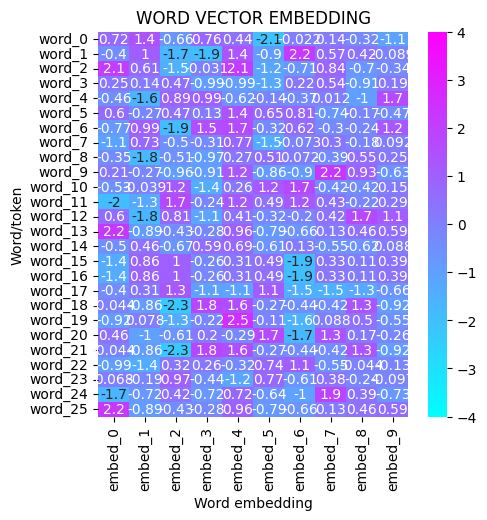

In [ ]:
# define the plotting using seaborn:
import seaborn as sns
def plotting(data,title):
    plt.figure(figsize=(5,5))
    sns.heatmap(data,cmap="cool",annot=True,vmax=4,vmin=-4)
    plt.ylabel("Word/token")
    plt.xlabel("Word embedding")
    plt.title(title)
    plt.show()
plottings = plotting(df,"WORD VECTOR EMBEDDING")

In [ ]:
reduced_embeddings = pca.fit_transform(numpy_embed_2d)
print(reduced_embeddings)

[[-1.6663449   0.5252225 ]
 [-1.3100686   2.58393   ]
 [-2.6056695  -0.68551415]
 [ 1.0492053   0.20864092]
 [ 1.7083732  -0.47867006]
 [ 0.14288916  0.6975134 ]
 [-1.8264006   1.7584773 ]
 [-0.4558858   1.1006358 ]
 [ 0.66037065 -0.1714869 ]
 [-1.2948011  -0.97970694]
 [ 2.1632338   1.7125119 ]
 [ 2.006168    1.5468433 ]
 [ 0.7708935  -1.143407  ]
 [-1.1005024  -1.5210934 ]
 [-0.48212296  1.0205564 ]
 [ 1.4623624  -0.5369305 ]
 [ 1.4623624  -0.5369305 ]
 [ 2.773495   -0.53201884]
 [-2.6507268  -0.21036781]
 [-1.5433084  -0.15360901]
 [ 0.48178318 -2.2090273 ]
 [-2.6507268  -0.21036781]
 [ 1.434762    0.8981769 ]
 [ 1.9664078  -0.7921967 ]
 [ 0.6047527  -0.37008846]
 [-1.1005023  -1.5210934 ]]


In [ ]:
embedding_df = pd.DataFrame(reduced_embeddings, columns = ['PCA1','PCA2'])

In [ ]:
trainvocab = []
for seq in train_x:
    for word in seq:
        trainvocab.append(word)
print(trainvocab)
print(len(trainvocab))

['The', 'Wonderful</w>', 'Wizard', 'of', 'Oz', 'is</w>', 'a</w>', "children's</w>", 'no', 'v', 'e', 'l</w>', 'w', 'r', 'i', 't', 't', 'en', '</w>', 'b', 'y', '</w>', 'L', '.</w>', 'F', 'r']
26


In [ ]:
embedding_df['word'] = trainvocab
print(embedding_df)

        PCA1      PCA2            word
0  -1.666345  0.525222             The
1  -1.310069  2.583930   Wonderful</w>
2  -2.605669 -0.685514          Wizard
3   1.049205  0.208641              of
4   1.708373 -0.478670              Oz
5   0.142889  0.697513          is</w>
6  -1.826401  1.758477           a</w>
7  -0.455886  1.100636  children's</w>
8   0.660371 -0.171487              no
9  -1.294801 -0.979707               v
10  2.163234  1.712512               e
11  2.006168  1.546843           l</w>
12  0.770894 -1.143407               w
13 -1.100502 -1.521093               r
14 -0.482123  1.020556               i
15  1.462362 -0.536931               t
16  1.462362 -0.536931               t
17  2.773495 -0.532019              en
18 -2.650727 -0.210368            </w>
19 -1.543308 -0.153609               b
20  0.481783 -2.209027               y
21 -2.650727 -0.210368            </w>
22  1.434762  0.898177               L
23  1.966408 -0.792197           .</w>
24  0.604753 -0.370088   

In [ ]:
# prepare data frame for heatmap
heatmap_df = embedding_df.drop(columns = ['word']).set_index(embedding_df['word'])
print(heatmap_df)

                    PCA1      PCA2
word                              
The            -1.666345  0.525222
Wonderful</w>  -1.310069  2.583930
Wizard         -2.605669 -0.685514
of              1.049205  0.208641
Oz              1.708373 -0.478670
is</w>          0.142889  0.697513
a</w>          -1.826401  1.758477
children's</w> -0.455886  1.100636
no              0.660371 -0.171487
v              -1.294801 -0.979707
e               2.163234  1.712512
l</w>           2.006168  1.546843
w               0.770894 -1.143407
r              -1.100502 -1.521093
i              -0.482123  1.020556
t               1.462362 -0.536931
t               1.462362 -0.536931
en              2.773495 -0.532019
</w>           -2.650727 -0.210368
b              -1.543308 -0.153609
y               0.481783 -2.209027
</w>           -2.650727 -0.210368
L               1.434762  0.898177
.</w>           1.966408 -0.792197
F               0.604753 -0.370088
r              -1.100502 -1.521093


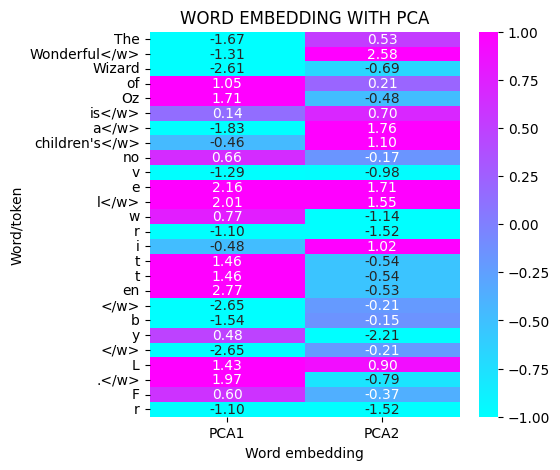

In [ ]:
def pcaplotting(data,title):
    plt.figure(figsize=(5,5))
    sns.heatmap(data,cmap="cool",annot=True,fmt='.2f',vmax=1,vmin=-1)
    plt.ylabel("Word/token")
    plt.xlabel("Word embedding")
    plt.title(title)
    plt.show()
pcaplottings = pcaplotting(heatmap_df,"WORD EMBEDDING WITH PCA")

In [ ]:
input_tensor = torch.tensor([[1.0,2.0,3.0,4.0], [5.0,6.0,7.0,8.0]])
print(input_tensor)

tensor([[1., 2., 3., 4.],
        [5., 6., 7., 8.]])


In [ ]:
random_float_number = torch.rand(1)
print(random_float_number)

tensor([0.5556])


In [ ]:
embedding_dims = 4
lineartransform = nn.Linear(embedding_dims,embedding_dims)
print(lineartransform)

Linear(in_features=4, out_features=4, bias=True)


In [ ]:
linear_output = lineartransform(input_tensor)
print(linear_output)

tensor([[-0.8105,  1.9850, -0.3686,  0.4542],
        [-1.0376,  4.4728, -0.3174,  0.8774]], grad_fn=<AddmmBackward0>)


In [ ]:
import torch

In [ ]:
embedding_dims = 4
x = torch.ones(embedding_dims)
print(x)

tensor([1., 1., 1., 1.])


In [ ]:
print(embed)

tensor([[[ 0.7187,  1.4068, -0.6583,  0.7622,  0.4379, -2.0784, -0.0217,
           0.1432, -0.3182, -1.1090],
         [-0.4033,  1.0490, -1.6980, -1.9063,  1.3688, -0.8977,  2.1744,
           0.5706,  0.4220, -0.0890]],

        [[ 2.0777,  0.6087, -1.4942, -0.0311,  2.0509, -1.2154, -0.7142,
           0.8420, -0.7005, -0.3382],
         [ 0.2462,  0.1380,  0.4725, -0.9924, -0.9933, -1.2682,  0.2220,
           0.5353, -0.9140,  0.1898]],

        [[-0.4602, -1.6276,  0.8910,  0.9869, -0.6221, -0.1432, -0.3742,
           0.0123, -0.9996,  1.6769],
         [ 0.6027, -0.2724,  0.4748,  0.1289,  1.3817,  0.6484,  0.8079,
          -0.7395, -0.1740, -0.4679]],

        [[-0.7735,  0.9903, -1.9175,  1.5393,  1.6565, -0.3186,  0.6188,
          -0.3041, -0.2364,  1.2293],
         [-1.1083,  0.7324, -0.5007, -0.3090,  0.7680, -1.4513, -0.0730,
           0.2963, -0.1752,  0.0917]],

        [[-0.3535, -1.8036, -0.5055, -0.9651,  0.2657,  0.5071,  0.0722,
          -0.3936,  0.5539,  0.

In [ ]:
embedding_dims = 10
maxlen = 10

In [ ]:
# positional encoding:
pe = torch.zeros(maxlen,embedding_dims)
print(pe)

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])


In [ ]:
position = torch.arange(0,maxlen,dtype=torch.float)
print(position)

tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])


In [ ]:
position = position.unsqueeze(1)
print(position)

tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]])


In [ ]:
log_term = -(np.log(10000.0)/embedding_dims)
print(log_term)

-0.9210340371976183


In [ ]:
pos = torch.arange(0,embedding_dims,2).float()
print(pos)

tensor([0., 2., 4., 6., 8.])


In [ ]:
torchmul = (pos) * (log_term)
print(torchmul)

tensor([-0.0000, -1.8421, -3.6841, -5.5262, -7.3683])


In [ ]:
div_term = torch.exp(torchmul)
print(div_term)

tensor([1.0000e+00, 1.5849e-01, 2.5119e-02, 3.9811e-03, 6.3096e-04])


In [ ]:
ans = (position) * (div_term)
print(ans)

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 1.5849e-01, 2.5119e-02, 3.9811e-03, 6.3096e-04],
        [2.0000e+00, 3.1698e-01, 5.0238e-02, 7.9621e-03, 1.2619e-03],
        [3.0000e+00, 4.7547e-01, 7.5357e-02, 1.1943e-02, 1.8929e-03],
        [4.0000e+00, 6.3396e-01, 1.0048e-01, 1.5924e-02, 2.5238e-03],
        [5.0000e+00, 7.9245e-01, 1.2559e-01, 1.9905e-02, 3.1548e-03],
        [6.0000e+00, 9.5094e-01, 1.5071e-01, 2.3886e-02, 3.7857e-03],
        [7.0000e+00, 1.1094e+00, 1.7583e-01, 2.7868e-02, 4.4167e-03],
        [8.0000e+00, 1.2679e+00, 2.0095e-01, 3.1849e-02, 5.0477e-03],
        [9.0000e+00, 1.4264e+00, 2.2607e-01, 3.5830e-02, 5.6786e-03]])


In [ ]:
pe[:,0::2] = torch.sin(ans)
pe[:,1::2] = torch.cos(ans)
print(pe)

tensor([[ 0.0000e+00,  1.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,
          1.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,  1.0000e+00],
        [ 8.4147e-01,  5.4030e-01,  1.5783e-01,  9.8747e-01,  2.5116e-02,
          9.9968e-01,  3.9811e-03,  9.9999e-01,  6.3096e-04,  1.0000e+00],
        [ 9.0930e-01, -4.1615e-01,  3.1170e-01,  9.5018e-01,  5.0217e-02,
          9.9874e-01,  7.9621e-03,  9.9997e-01,  1.2619e-03,  1.0000e+00],
        [ 1.4112e-01, -9.8999e-01,  4.5775e-01,  8.8908e-01,  7.5285e-02,
          9.9716e-01,  1.1943e-02,  9.9993e-01,  1.8929e-03,  1.0000e+00],
        [-7.5680e-01, -6.5364e-01,  5.9234e-01,  8.0569e-01,  1.0031e-01,
          9.9496e-01,  1.5924e-02,  9.9987e-01,  2.5238e-03,  1.0000e+00],
        [-9.5892e-01,  2.8366e-01,  7.1207e-01,  7.0211e-01,  1.2526e-01,
          9.9212e-01,  1.9904e-02,  9.9980e-01,  3.1548e-03,  1.0000e+00],
        [-2.7942e-01,  9.6017e-01,  8.1396e-01,  5.8092e-01,  1.5014e-01,
          9.8866e-01,  2.3884e-0

In [ ]:
pe = pe.unsqueeze(0)
print(pe)

tensor([[[ 0.0000e+00,  1.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,
           1.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,  1.0000e+00],
         [ 8.4147e-01,  5.4030e-01,  1.5783e-01,  9.8747e-01,  2.5116e-02,
           9.9968e-01,  3.9811e-03,  9.9999e-01,  6.3096e-04,  1.0000e+00],
         [ 9.0930e-01, -4.1615e-01,  3.1170e-01,  9.5018e-01,  5.0217e-02,
           9.9874e-01,  7.9621e-03,  9.9997e-01,  1.2619e-03,  1.0000e+00],
         [ 1.4112e-01, -9.8999e-01,  4.5775e-01,  8.8908e-01,  7.5285e-02,
           9.9716e-01,  1.1943e-02,  9.9993e-01,  1.8929e-03,  1.0000e+00],
         [-7.5680e-01, -6.5364e-01,  5.9234e-01,  8.0569e-01,  1.0031e-01,
           9.9496e-01,  1.5924e-02,  9.9987e-01,  2.5238e-03,  1.0000e+00],
         [-9.5892e-01,  2.8366e-01,  7.1207e-01,  7.0211e-01,  1.2526e-01,
           9.9212e-01,  1.9904e-02,  9.9980e-01,  3.1548e-03,  1.0000e+00],
         [-2.7942e-01,  9.6017e-01,  8.1396e-01,  5.8092e-01,  1.5014e-01,
           9.8866e-

In [ ]:
pe = pe.transpose(0,1)
print(pe)

tensor([[[ 0.0000e+00,  1.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,
           1.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,  1.0000e+00]],

        [[ 8.4147e-01,  5.4030e-01,  1.5783e-01,  9.8747e-01,  2.5116e-02,
           9.9968e-01,  3.9811e-03,  9.9999e-01,  6.3096e-04,  1.0000e+00]],

        [[ 9.0930e-01, -4.1615e-01,  3.1170e-01,  9.5018e-01,  5.0217e-02,
           9.9874e-01,  7.9621e-03,  9.9997e-01,  1.2619e-03,  1.0000e+00]],

        [[ 1.4112e-01, -9.8999e-01,  4.5775e-01,  8.8908e-01,  7.5285e-02,
           9.9716e-01,  1.1943e-02,  9.9993e-01,  1.8929e-03,  1.0000e+00]],

        [[-7.5680e-01, -6.5364e-01,  5.9234e-01,  8.0569e-01,  1.0031e-01,
           9.9496e-01,  1.5924e-02,  9.9987e-01,  2.5238e-03,  1.0000e+00]],

        [[-9.5892e-01,  2.8366e-01,  7.1207e-01,  7.0211e-01,  1.2526e-01,
           9.9212e-01,  1.9904e-02,  9.9980e-01,  3.1548e-03,  1.0000e+00]],

        [[-2.7942e-01,  9.6017e-01,  8.1396e-01,  5.8092e-01,  1.5014e-01,
       

In [ ]:
print(pe.shape)

torch.Size([10, 1, 10])


In [ ]:
print(embed.shape)

torch.Size([13, 2, 10])


In [ ]:
pe2 = pe.unsqueeze(0)
print(pe2.shape)

torch.Size([1, 10, 1, 10])


In [ ]:
positional_encoding = pe2.repeat(13,2,1,1)
print(positional_encoding.shape)

torch.Size([13, 20, 1, 10])


In [ ]:
positional_encoding = positional_encoding.reshape(13,2,10,10)
print(positional_encoding.shape)

torch.Size([13, 2, 10, 10])


In [ ]:
positional_encoding = positional_encoding[:,:,:,:10]
print(positional_encoding.shape)

torch.Size([13, 2, 10, 10])


torch.Size([13, 2, 10, 10])


In [ ]:
print(pe.shape)

torch.Size([10, 1, 10])


In [ ]:
pe3 = pe[:2,:,:].transpose(0,1)
print(pe3.shape)

torch.Size([1, 2, 10])


In [ ]:
pe4 = pe3.repeat(13,1,1)
print(pe4.shape)

torch.Size([13, 2, 10])


In [ ]:
embedpos = embed + pe4
print(embedpos.shape)

torch.Size([13, 2, 10])


In [ ]:
print(embedpos)

tensor([[[ 0.7187,  2.4068, -0.6583,  1.7622,  0.4379, -1.0784, -0.0217,
           1.1432, -0.3182, -0.1090],
         [ 0.4381,  1.5893, -1.5402, -0.9189,  1.3940,  0.1020,  2.1783,
           1.5706,  0.4226,  0.9110]],

        [[ 2.0777,  1.6087, -1.4942,  0.9689,  2.0509, -0.2154, -0.7142,
           1.8420, -0.7005,  0.6618],
         [ 1.0877,  0.6783,  0.6304, -0.0049, -0.9682, -0.2685,  0.2260,
           1.5353, -0.9134,  1.1898]],

        [[-0.4602, -0.6276,  0.8910,  1.9869, -0.6221,  0.8568, -0.3742,
           1.0123, -0.9996,  2.6769],
         [ 1.4442,  0.2680,  0.6326,  1.1164,  1.4068,  1.6481,  0.8118,
           0.2605, -0.1734,  0.5321]],

        [[-0.7735,  1.9903, -1.9175,  2.5393,  1.6565,  0.6814,  0.6188,
           0.6959, -0.2364,  2.2293],
         [-0.2668,  1.2727, -0.3429,  0.6785,  0.7931, -0.4516, -0.0690,
           1.2963, -0.1746,  1.0917]],

        [[-0.3535, -0.8036, -0.5055,  0.0349,  0.2657,  1.5071,  0.0722,
           0.6064,  0.5539,  1.

In [ ]:
embedposnp = embedpos.detach().numpy()
print(embedposnp)

[[[ 0.71873397  2.4068048  -0.6582655   1.762241    0.43785712
   -1.0783796  -0.02169541  1.1432447  -0.31818375 -0.10904336]
  [ 0.43813732  1.5893319  -1.540157   -0.9188819   1.3939624
    0.1019901   2.1783476   1.5705534   0.42258555  0.9110335 ]]

 [[ 2.077672    1.6086922  -1.4942358   0.96887934  2.050908
   -0.21539259 -0.7142256   1.8419712  -0.70053494  0.66176856]
  [ 1.0877173   0.6783233   0.6303663  -0.00489056 -0.96819955
   -0.26853424  0.2260162   1.5352618  -0.9133934   1.189825  ]]

 [[-0.4602452  -0.62757134  0.8910456   1.9868976  -0.62214637
    0.85680485 -0.37417057  1.0122964  -0.99964964  2.6769004 ]
  [ 1.4441929   0.26795083  0.63260174  1.1163769   1.4067711
    1.6480721   0.8118366   0.2604844  -0.17338252  0.5321369 ]]

 [[-0.7735015   1.9903455  -1.9174842   2.53933     1.6564549
    0.6813656   0.6188243   0.6958968  -0.23640354  2.2292943 ]
  [-0.26678038  1.2727368  -0.34287408  0.6784948   0.79308385
   -0.45164675 -0.06904773  1.2963066  -0.17455

In [ ]:
embedposnp2d = embedposnp.reshape(-1,embedding_dims)
print(embedposnp2d.shape)

(26, 10)


In [ ]:
embedpospca = pca.fit_transform(embedposnp2d)
print(embedpospca)

[[-1.611535   -0.50585055]
 [-1.3604428  -0.3785041 ]
 [-2.5859141   0.8781276 ]
 [ 0.9698478   1.2705306 ]
 [ 1.7715558  -0.23794433]
 [ 0.07328904  0.5278322 ]
 [-1.7153591  -2.516699  ]
 [-0.48934036 -0.61003476]
 [ 0.70991063 -0.05899425]
 [-1.3702164   1.2255398 ]
 [ 2.2170057  -0.732409  ]
 [ 1.9743093  -0.80973876]
 [ 0.786979    1.329763  ]
 [-1.2145239   2.7092261 ]
 [-0.40118304 -1.4369153 ]
 [ 1.4279217  -0.30102885]
 [ 1.5428063  -1.1615523 ]
 [ 2.7073774   0.7046249 ]
 [-2.5664713  -1.3214492 ]
 [-1.5778726  -0.538879  ]
 [ 0.526399    0.5643161 ]
 [-2.681356   -0.46092582]
 [ 1.5098096  -1.1258965 ]
 [ 1.8943851   1.1735818 ]
 [ 0.67714447 -0.89594656]
 [-1.214524    2.7092261 ]]


In [ ]:
df1 = pd.DataFrame(embedpospca,columns = ['PCA1','PCA2'])
df1['word'] = trainvocab
heatmap_df1 = df1.drop(columns = ['word']).set_index(df1['word'])
print(heatmap_df1)

                    PCA1      PCA2
word                              
The            -1.611535 -0.505851
Wonderful</w>  -1.360443 -0.378504
Wizard         -2.585914  0.878128
of              0.969848  1.270531
Oz              1.771556 -0.237944
is</w>          0.073289  0.527832
a</w>          -1.715359 -2.516699
children's</w> -0.489340 -0.610035
no              0.709911 -0.058994
v              -1.370216  1.225540
e               2.217006 -0.732409
l</w>           1.974309 -0.809739
w               0.786979  1.329763
r              -1.214524  2.709226
i              -0.401183 -1.436915
t               1.427922 -0.301029
t               1.542806 -1.161552
en              2.707377  0.704625
</w>           -2.566471 -1.321449
b              -1.577873 -0.538879
y               0.526399  0.564316
</w>           -2.681356 -0.460926
L               1.509810 -1.125896
.</w>           1.894385  1.173582
F               0.677144 -0.895947
r              -1.214524  2.709226


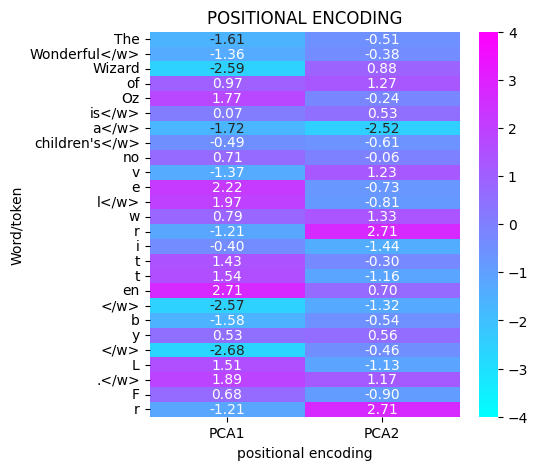

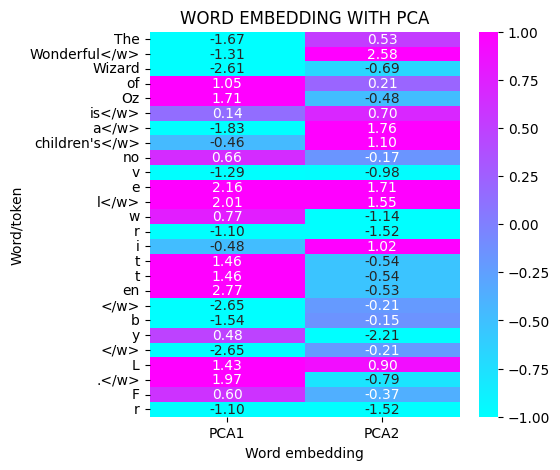

In [ ]:
def positionalplotting(data,title):
    plt.figure(figsize=(5,5))
    sns.heatmap(data,cmap="cool",annot=True,fmt='.2f',vmax=4,vmin=-4)
    plt.ylabel("Word/token")
    plt.xlabel("positional encoding")
    plt.title(title)
    plt.show()
positionalplotting = positionalplotting(heatmap_df1,"POSITIONAL ENCODING")
pcaplottings = pcaplotting(heatmap_df,"WORD EMBEDDING WITH PCA")

In [ ]:
query = nn.Linear(10,10)
print(query)

Linear(in_features=10, out_features=10, bias=True)


In [ ]:
key = nn.Linear(10,10)
print(key)

Linear(in_features=10, out_features=10, bias=True)


In [ ]:
value = nn.Linear(10,10)
print(value)

Linear(in_features=10, out_features=10, bias=True)


In [ ]:
# linear transformation  formula:  1/sqrt(embedding_dims) = a
# no the values inside weights are in range between -a and a
# input tensor = embedpos
# default bias is set to 0
# so linear transformation =  (input tensor * weights) +  bias

In [ ]:
batch_size, seq_len, embedding_dims = embedpos.shape

In [ ]:
print(batch_size)
print(seq_len)
print(embedding_dims)

13
2
10


In [ ]:
Query = query(embedpos)
print(Query)

tensor([[[ 0.0184, -0.0978,  0.5360, -0.1860,  0.8458,  1.0744,  0.6412,
          -0.1986, -0.5018,  0.2858],
         [ 1.4410, -1.2920,  0.3816, -1.1047,  0.3893,  0.8943, -1.0174,
           0.4567,  0.3406, -0.9872]],

        [[-0.0975, -1.3245,  0.3684,  0.0499,  0.4049,  0.8531,  0.2823,
           0.1090, -0.1377,  0.6024],
         [ 0.0431, -0.3570,  0.7098,  0.3152, -0.1340,  0.0939,  0.0266,
           0.0118,  0.1734,  0.3207]],

        [[-0.7266, -0.0778, -0.2015,  1.0362,  0.4035, -0.8052,  0.7323,
          -0.8130,  0.7911,  0.5899],
         [-0.7074, -0.4697, -0.7314,  0.1715,  0.3058,  1.2304, -1.0594,
          -0.4556, -0.5929, -0.1273]],

        [[ 0.4560, -0.6565, -0.1199, -0.1541,  1.6544,  0.4411,  0.7420,
          -0.9812,  0.4664, -0.2534],
         [ 0.2119, -0.6621,  0.2661, -0.2892,  0.4903,  0.2131,  0.3123,
          -0.1075,  0.2616,  0.0110]],

        [[-0.0086, -0.7371, -0.4512,  0.1620, -0.2434, -0.5635, -0.6337,
          -0.3420,  0.6392, -0.

In [ ]:
Key = key(embedpos)
print(Key)

tensor([[[ 0.5938,  0.5396, -0.3972, -0.0099,  0.3162,  0.2051,  0.1434,
          -1.3767,  0.3306, -0.6207],
         [ 0.8579,  1.1815, -1.5187, -0.3585,  0.4388, -0.3339,  0.4883,
          -1.1032, -0.1117, -0.1253]],

        [[ 0.8885,  0.3202, -0.9735, -0.3735,  1.5389,  0.2222,  0.0469,
          -1.6395, -0.5260, -0.8582],
         [ 1.4805,  0.1139,  0.3586, -0.3351,  0.2319, -0.2571, -0.5634,
          -1.2229, -1.1735, -0.0703]],

        [[ 0.7559, -1.4273,  0.6116, -0.6800,  0.1912, -0.1455, -0.2869,
          -0.9175, -0.5796,  0.6531],
         [ 0.5675,  0.0318, -0.4945, -0.7908, -0.1632,  0.5842, -0.0551,
          -0.1819, -0.0838, -0.1245]],

        [[ 0.0927, -0.4641, -1.0840, -0.6117,  0.3952,  0.1406,  1.0168,
          -1.4161,  1.1649,  0.1397],
         [ 0.7879,  0.2289, -0.3041, -0.0736,  0.5400, -0.0848,  0.1662,
          -1.0296, -0.1983, -0.2202]],

        [[ 0.3750, -0.3765, -0.3230, -0.4435,  0.3568, -0.7779, -0.0777,
          -0.0433, -0.3648,  0.

In [ ]:
Value = value(embedpos)
print(Value)

tensor([[[-7.3554e-01,  8.3893e-01,  8.7685e-01,  7.4901e-01,  2.2329e-01,
          -4.8690e-01,  3.4220e-01, -1.7140e-01, -6.4066e-01,  5.3894e-01],
         [-1.4339e+00,  4.4258e-01,  1.1214e+00, -1.0191e+00, -1.0659e+00,
           7.5435e-01, -4.2767e-01, -1.1927e-01, -9.6574e-01,  1.2553e+00]],

        [[-9.2324e-01,  1.1258e+00,  3.0360e-01, -4.3813e-01, -8.8793e-01,
           3.2754e-01,  3.2914e-01,  2.5137e-01,  5.9992e-02,  1.6036e-01],
         [-4.7704e-01,  1.0959e+00,  1.8517e-01,  1.7956e-01,  1.4722e-01,
          -1.6293e-01,  8.3138e-01, -1.4745e-01, -5.0486e-01,  3.3596e-01]],

        [[ 4.1717e-01,  1.3528e+00, -6.5270e-01,  1.5171e-02,  6.0496e-01,
           8.3918e-01,  7.4339e-01,  2.9053e-01, -1.2525e-01,  2.0028e-01],
         [-1.3690e-01, -2.8841e-01, -8.0857e-01, -7.2272e-01, -1.1641e-01,
           6.4974e-01, -2.0219e-01, -1.5306e-01,  7.5704e-01,  1.0269e-02]],

        [[-8.1461e-01,  1.0263e+00,  7.3377e-01, -5.9099e-01, -1.6929e-01,
           1.

In [ ]:
num_heads = 2
Query = Query.view(batch_size,seq_len,num_heads,embedding_dims//num_heads).transpose(1,2)
print(Query.shape)

torch.Size([13, 2, 2, 5])


In [ ]:
Key = Key.view(batch_size,seq_len,num_heads,embedding_dims//num_heads).transpose(1,2)
print(Key.shape)

torch.Size([13, 2, 2, 5])


In [ ]:
Value = Value.view(batch_size,seq_len,num_heads,embedding_dims//num_heads).transpose(1,2)
print(Value.shape)

torch.Size([13, 2, 2, 5])


In [ ]:
keys = Key.transpose(-2,-1)
print(keys.shape)

torch.Size([13, 2, 5, 2])


In [ ]:
attention_scores = torch.matmul(Query,keys)/math.sqrt(embedding_dims)
print(attention_scores)

tensor([[[[ 0.0046, -0.1505],
          [ 0.0446, -0.0958]],

         [[ 0.0767,  0.0613],
          [ 0.0424, -0.3838]]],


        [[[-0.0838, -0.0272],
          [-0.3450,  0.0446]],

         [[-0.1330, -0.1241],
          [-0.1150, -0.0884]]],


        [[[-0.3760, -0.3796],
          [-0.1170, -0.0760]],

         [[ 0.1833, -0.1589],
          [ 0.2541,  0.2927]]],


        [[[ 0.3874,  0.3637],
          [ 0.1294,  0.0697]],

         [[ 0.8582,  0.3350],
          [ 0.2549,  0.0285]]],


        [[[ 0.0826, -0.0631],
          [ 0.1494, -0.4100]],

         [[ 0.0310,  0.1650],
          [ 0.1293, -0.1284]]],


        [[[ 0.3139,  0.3039],
          [-0.0700,  0.1000]],

         [[-0.0939, -0.0459],
          [-0.0349, -0.0298]]],


        [[[-0.0358, -0.0154],
          [-0.2663, -0.2023]],

         [[ 0.1714,  0.2953],
          [ 0.2483,  0.4054]]],


        [[[ 0.0331, -0.0013],
          [-0.0122, -0.3045]],

         [[ 0.2821, -0.1140],
          [ 0.2673,  0.082

In [ ]:
attention_probs = nn.Softmax(dim = -1)(attention_scores)
print(attention_probs)

tensor([[[[0.5387, 0.4613],
          [0.5350, 0.4650]],

         [[0.5039, 0.4961],
          [0.6050, 0.3950]]],


        [[[0.4859, 0.5141],
          [0.4038, 0.5962]],

         [[0.4978, 0.5022],
          [0.4934, 0.5066]]],


        [[[0.5009, 0.4991],
          [0.4898, 0.5102]],

         [[0.5847, 0.4153],
          [0.4903, 0.5097]]],


        [[[0.5059, 0.4941],
          [0.5149, 0.4851]],

         [[0.6279, 0.3721],
          [0.5563, 0.4437]]],


        [[[0.5364, 0.4636],
          [0.6363, 0.3637]],

         [[0.4665, 0.5335],
          [0.5641, 0.4359]]],


        [[[0.5025, 0.4975],
          [0.4576, 0.5424]],

         [[0.4880, 0.5120],
          [0.4987, 0.5013]]],


        [[[0.4949, 0.5051],
          [0.4840, 0.5160]],

         [[0.4691, 0.5309],
          [0.4608, 0.5392]]],


        [[[0.5086, 0.4914],
          [0.5725, 0.4275]],

         [[0.5977, 0.4023],
          [0.5460, 0.4540]]],


        [[[0.5106, 0.4894],
          [0.4629, 0.5371]],

In [ ]:
attention_output = torch.matmul(attention_probs,Value)
print(attention_output)

tensor([[[[-0.6208,  0.6098,  0.3933,  0.1080,  0.3689],
          [-0.6199,  0.6080,  0.3895,  0.1029,  0.3701]],

         [[-0.3482,  0.0108,  0.5058, -0.9926,  0.0858],
          [-0.5695,  0.0988,  0.6313, -0.9980, -0.1489]]],


        [[[-0.2802,  0.7162,  0.2767, -0.1820, -0.3490],
          [-0.1775,  0.6508,  0.2725, -0.1412, -0.2629]],

         [[-0.3193,  0.9630,  0.0181, -0.1642,  0.2420],
          [-0.3179,  0.9619,  0.0167, -0.1672,  0.2428]]],


        [[[ 0.6278,  1.0486, -0.1819, -0.0549,  0.4030],
          [ 0.6325,  1.0418, -0.1714, -0.0565,  0.3985]],

         [[ 0.1898, -0.2526, -0.5364, -0.1082, -0.0638],
          [ 0.2640, -0.2445, -0.4745,  0.0314, -0.0518]]],


        [[[ 0.1349,  0.2661,  0.4060, -0.7665,  0.3228],
          [ 0.1176,  0.2799,  0.4120, -0.7633,  0.3138]],

         [[-0.1049,  0.5962,  0.4207, -0.1633,  0.0994],
          [-0.0370,  0.5661,  0.3875, -0.2173,  0.1541]]],


        [[[ 0.7254,  0.1815, -0.2127, -0.6774, -0.0402],
       

In [ ]:
out = nn.Linear(embedding_dims,embedding_dims)

In [ ]:
print(attention_output.shape)

torch.Size([13, 2, 2, 5])


In [ ]:
attention_output = attention_output.transpose(1,2)
print(attention_output.shape)

torch.Size([13, 2, 2, 5])


In [ ]:
attention_output = attention_output.contiguous().view(batch_size,seq_len,embedding_dims)
print(attention_output.shape)

torch.Size([13, 2, 10])


In [ ]:
output = out(attention_output)
print(output)

tensor([[[ 0.2770, -0.3724, -0.2015,  0.2981,  0.5481,  0.2110,  0.3156,
          -0.0955, -0.3557, -0.1439],
         [ 0.3578, -0.4293, -0.1163,  0.4709,  0.5876,  0.2046,  0.4244,
          -0.1836, -0.2967, -0.1865]],

        [[ 0.3541, -0.2868,  0.2289, -0.0073,  0.2257,  0.5655, -0.0317,
          -0.0719, -0.3764, -0.3388],
         [ 0.3566, -0.2560,  0.2317,  0.0471,  0.1968,  0.5455,  0.0023,
          -0.0611, -0.3999, -0.3153]],

        [[-0.1768, -0.0177,  0.4398, -0.1762,  0.4232,  0.0316, -0.2110,
          -0.0034, -0.7643, -0.3337],
         [-0.1675, -0.0236,  0.4538, -0.1937,  0.4083,  0.0689, -0.2031,
          -0.0458, -0.7681, -0.3283]],

        [[ 0.1064, -0.0757,  0.3175,  0.1002,  0.2057,  0.4786,  0.0867,
          -0.1544, -0.1618, -0.2488],
         [ 0.0760, -0.0658,  0.2758,  0.0495,  0.2048,  0.4729,  0.0517,
          -0.1271, -0.1725, -0.2324]],

        [[-0.0692,  0.0755,  0.4211,  0.1022, -0.0020,  0.5431, -0.0905,
          -0.2791, -0.1647, -0.

In [ ]:
# beta for scaling and gamma for shifting
beta = torch.ones(embedding_dims)
gamma = torch.zeros(embedding_dims)
print(beta)
print(gamma)

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


In [ ]:
mean = output.mean(dim=-1,keepdim=True)

In [ ]:
variance = output.var(dim=-1,keepdim=True,unbiased=False)

In [ ]:
eps = 1e-5

In [ ]:
normalized = (output-mean)/torch.sqrt(variance + eps)

In [ ]:
output1 = (beta * normalized) + gamma
print(output1)

tensor([[[ 7.5347e-01, -1.3842e+00, -8.2153e-01,  8.2325e-01,  1.6460e+00,
           5.3635e-01,  8.8067e-01, -4.7259e-01, -1.3294e+00, -6.3200e-01],
         [ 7.9166e-01, -1.4784e+00, -5.7554e-01,  1.1181e+00,  1.4546e+00,
           3.4986e-01,  9.8374e-01, -7.6974e-01, -1.0960e+00, -7.7823e-01]],

        [[ 1.1015e+00, -1.0510e+00,  6.8099e-01, -1.1225e-01,  6.7020e-01,
           1.8112e+00, -1.9430e-01, -3.2907e-01, -1.3518e+00, -1.2255e+00],
         [ 1.1132e+00, -1.0058e+00,  6.8101e-01,  4.2626e-02,  5.6041e-01,
           1.7663e+00, -1.1220e-01, -3.3153e-01, -1.5033e+00, -1.2108e+00]],

        [[-2.9340e-01,  1.8322e-01,  1.5538e+00, -2.9166e-01,  1.5041e+00,
           3.3081e-01, -3.9588e-01,  2.2617e-01, -2.0537e+00, -7.6342e-01],
         [-2.6152e-01,  1.6829e-01,  1.5941e+00, -3.3975e-01,  1.4582e+00,
           4.4446e-01, -3.6804e-01,  1.0180e-01, -2.0556e+00, -7.4200e-01]],

        [[ 1.8776e-01, -6.4677e-01,  1.1552e+00,  1.5939e-01,  6.4295e-01,
           1.

In [ ]:
# transformer block:
# 1. self attention mechanism
# 2. layer normalization
# 3. dropout
# 4. feed forward network: -> linear transformation, relu activation and again linear transformation.
# 5. layer normalization
# 6. dropout

In [ ]:
# custom entropy loss function process:
1. calculate the log s0ftmax values
suppose   matrix = [[1,2,3]
                    [4,5,6]]
targets = [0,1]      each row corresponds to each word.
first row  = [1,2,3]
second row = [4,5,6]
log_softmax of row1 = row1 - log(row1)
log_softmax of row2 = row2 - log(row2)
sum = log_softmaxrow1[0] + log_softmax_row2[1]
sum = -sum
loss value = sum/batch_size   where batch_size = 2
loss value = sum/2

In [ ]:
predictions = torch.tensor([[2.0, 1.0, 0.5, 0.3, 0.2],
                            [1.5, 2.1, 0.8, 0.6, 0.5],
                            [0.5, 1.0, 1.5, 2.0, 0.5],
                            [0.3, 0.5, 0.7, 1.0, 2.5]], dtype=torch.float32)

In [ ]:
targets = torch.tensor([1, 2, 3, 4], dtype=torch.long)

In [ ]:
log_softmax = torch.log_softmax(predictions, dim=-1)
print(log_softmax)

tensor([[-0.6622, -1.6622, -2.1622, -2.3622, -2.4622],
        [-1.4093, -0.8093, -2.1093, -2.3093, -2.4093],
        [-2.3840, -1.8840, -1.3840, -0.8840, -2.3840],
        [-2.6914, -2.4914, -2.2914, -1.9914, -0.4914]])


In [ ]:
selected_logsoftmax = log_softmax[range(4),targets]
print(selected_logsoftmax)

tensor([-1.6622, -2.1093, -0.8840, -0.4914])


In [ ]:
sum = sum(selected_logsoftmax)
print(sum)

tensor(-5.1469)


In [ ]:
sum = -sum
print(sum)

tensor(5.1469)


In [ ]:
loss = sum/4
print(loss)

tensor(1.2867)


In [ ]:
# for matrix: to get the an element from each rows
suppose x is a matrix
targets = [1,2,3]   and x is a 3 x 4 matrix

In [ ]:
to get list of 1st element from 1st row, and 2nd element from 2nd row and 3rd element from 3rd row.
set range as 3 since u need 3 elements
formula:    list = matrix[range(len(targets)),targets]

In [ ]:
# learning rate scheduler:
initial learning rate = 0.0001
warmup steps are gradually increase the learning rate to the initial learing rate for  gradient stability.
they gradually increase from 0 to 0.0001
so lets say warm up steps =  5
so till 5 epoch the learning rate does not reach 0.0001
but between 0 to 0.0001
-> if current epoch is less than warmup steps
then lr = current epoch/warmup steps * initial learning rate
else if current epoch is equal to or greater than warmup steps
set gamma value as 0.5 or something
lr = initial learning rate * gamma**((current epoch - warmup_Steps)//step_size)
gamma determines how much u are going to reduce the learning rate.
0.5 is the most common used value for most of the cases.

In [ ]:
import torch

In [ ]:
print(torch.rand(1).item())

0.4200630187988281


In [ ]:
# stocahstic depth:
skips a layer if the random probability value is greater than p
else applies the layer transformation to the input.
also if not in training mode, it applies layer transformation.

In [ ]:
# custom adam optimizer:
-> exponential avg refers to the smoothening of the gradient flow
-> exponential avg square refers to how much the gradient torch.channel_shuffle
-> first initialize the expavg and expavgsq to 0
-> update the step count by 1
-> calculate the exp avg  and expavgsq
-> compute the bias correction estimate
-> update the parameter p using rhe calculates step size
                       example:
parameter p = 0.5'
gardient g = 0.1
learning rate n = 0.01
b1 = 0.9 (beta)
b2 = 0.999 (beta)
e = 1 * (10**-8)
exp_avg = 0
exp_avg_sq = 0
t = 0
-> update the step count by 1  ( t by 1)
so t = 1
-> calculate the first moment estimate(exp_avg):
   (beta1  * first moment estimate) + (1-beta1) * gradient
-> calculate the second moment estimate(exp_avg_sq):
   (beta2 * second moment estimate) + (1- beta2)* gradient**2
-> calculate the bias correction estimate:
   bias1 = (first moment estimate) / (1 - beat1**t)
   bias2 = (second moment estimate) / (1 - beta2**t)
-> update the parameter p:
   p1 = p -

